# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from lazypredict.Supervised import LazyClassifier

In [2]:
df = pd.read_csv("advertising2.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
df.sample(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
179,85.86,34,63115.34,208.23,Networked high-level structure,New Jeffreychester,0,Bouvet Island (Bouvetoya),2016-05-23 02:15:04,0
468,65.59,47,28265.81,121.81,Digitized disintermediate ability,Brandymouth,0,Indonesia,2016-03-22 06:41:38,1
751,77.75,31,59047.91,240.64,Multi-lateral motivating circuit,Coxhaven,1,Paraguay,2016-06-22 17:19:09,0
151,78.54,35,72524.86,172.10,Multi-channeled asynchronous open system,Port Jodi,0,Togo,2016-05-28 20:41:50,0
905,75.94,27,53042.51,236.96,Future-proofed stable function,Campbellstad,1,Italy,2016-02-16 12:05:45,0
463,36.49,52,42136.33,196.61,Object-based system-worthy superstructure,Ryanhaven,1,Lao People's Democratic Republic,2016-03-09 00:41:46,1
528,46.61,52,27241.11,156.99,Ergonomic methodical encoding,Danielview,0,New Zealand,2016-04-05 05:54:15,1
591,57.20,42,57739.03,110.66,Innovative maximized groupware,East Heatherside,0,New Zealand,2016-03-19 11:09:36,1
516,84.81,32,43299.63,233.93,Multi-layered stable encoding,Brownbury,1,Greece,2016-07-04 23:17:47,0
327,76.84,32,65883.39,231.59,Reduced incremental productivity,Faithview,0,Singapore,2016-03-03 22:31:16,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.00,65.00,15.85,32.60,51.36,68.22,78.55,91.43
Age,1000.00,36.01,8.79,19.00,29.00,35.00,42.00,61.00
Area Income,1000.00,55000.00,13414.63,13996.50,47031.80,57012.30,65470.63,79484.80
Daily Internet Usage,1000.00,180.00,43.90,104.78,138.83,183.13,218.79,269.96
Male,1000.00,0.48,0.50,0.00,0.00,0.00,1.00,1.00
Clicked on Ad,1000.00,0.50,0.50,0.00,0.00,0.50,1.00,1.00


In [6]:
df["Clicked on Ad"].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

In [7]:
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [8]:
cat_features = df.select_dtypes(include="object").columns
cat_features

Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object')

In [9]:
unique_values(df, cat_features)

Column: Ad Topic Line
------------------------------
Unique Values (1000): ['Cloned 5thgeneration orchestration' 'Monitored national standardization'
 'Organic bottom-line service-desk'
 'Triple-buffered reciprocal time-frame' 'Robust logistical utilization'
 'Sharable client-driven software' 'Enhanced dedicated support'
 'Reactive local challenge' 'Configurable coherent function'
 'Mandatory homogeneous architecture' 'Centralized neutral neural-net'
 'Team-oriented grid-enabled Local Area Network'
 'Centralized content-based focus group'
 'Synergistic fresh-thinking array' 'Grass-roots coherent extranet'
 'Persistent demand-driven interface' 'Customizable multi-tasking website'
 'Intuitive dynamic attitude'
 'Grass-roots solution-oriented conglomeration'
 'Advanced 24/7 productivity' 'Object-based reciprocal knowledgebase'
 'Streamlined non-volatile analyzer'
 'Mandatory disintermediate utilization'
 'Future-proofed methodical protocol' 'Exclusive neutral parallelism'
 'Public-key for

In [10]:
for feature in df.columns:
    if df[feature].dtype=="object":
        print(feature, df[feature].nunique())
        
        
# Kategorik featureların unique gözlem sayılarını tespit ediyoruz.
# Çok fazla unique kategorik gözlem barındıran featurları drop edeceğiz. 
# Çok fazla unique kategorik gözlem barındıran featurlara tree based modeller çok fazla ağırlık atayabiliyordu. 
# Hem de model sayısı az olan unique kategorik gözlemlerden birşey öğrenemiyordu.

Ad Topic Line 1000
City 969
Country 237
Timestamp 1000


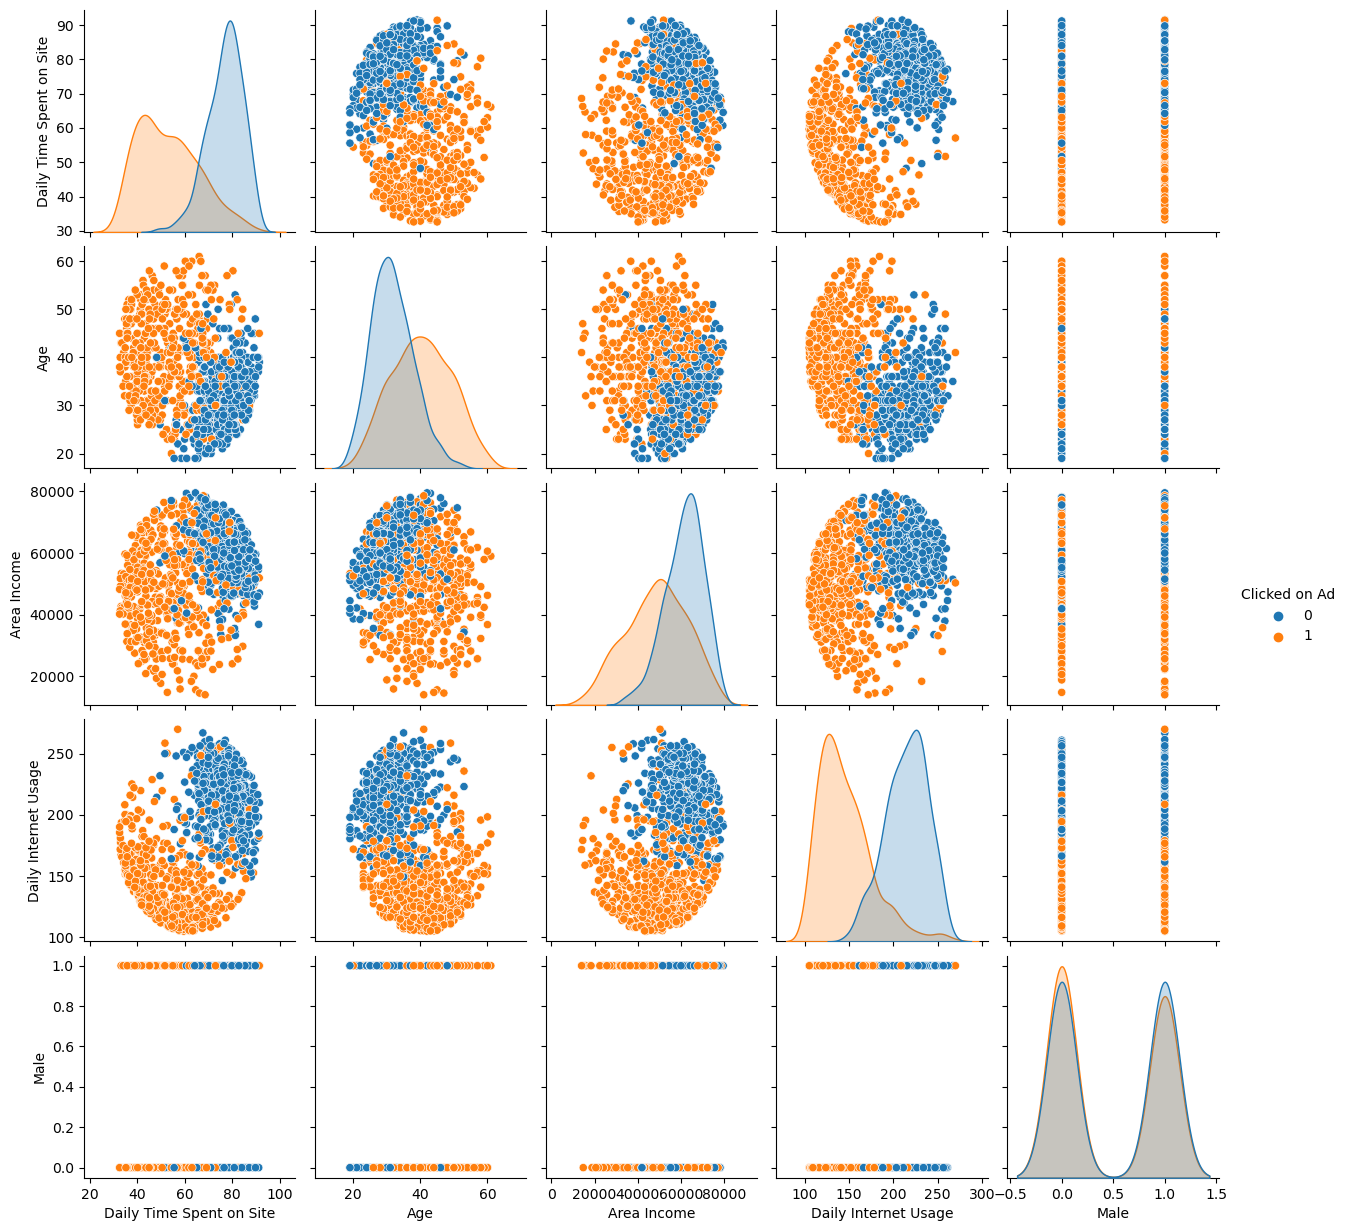

In [11]:
sns.pairplot(df, hue="Clicked on Ad");

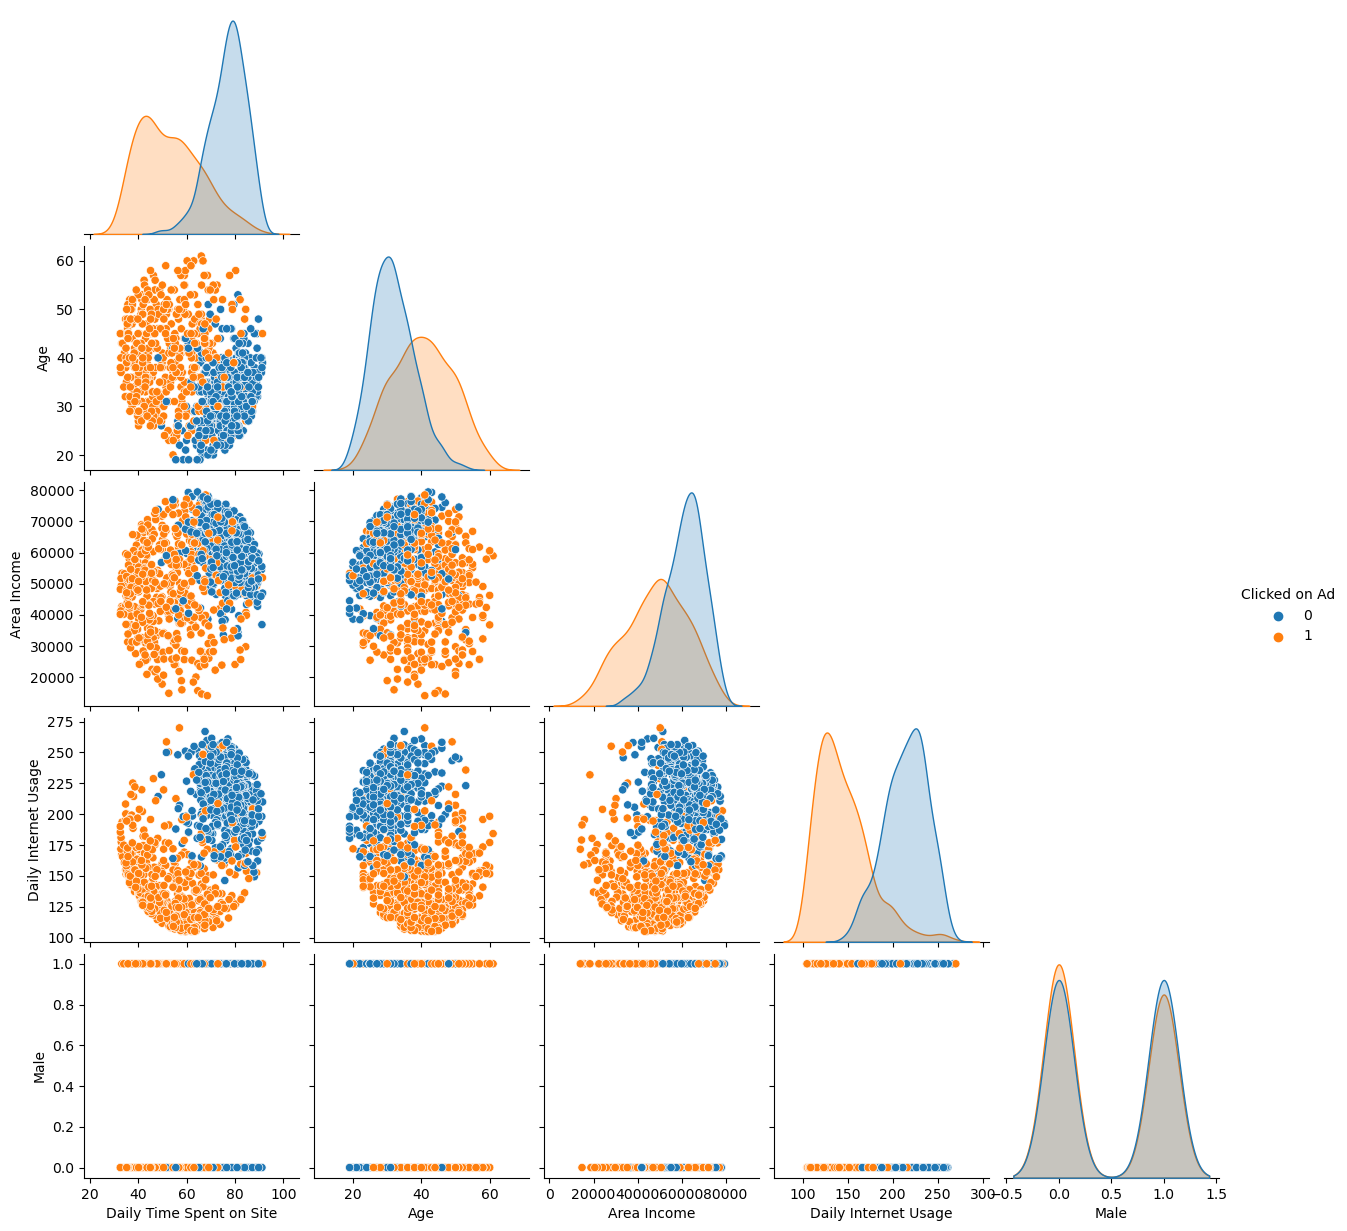

In [12]:
sns.pairplot(df, hue="Clicked on Ad", corner=True);

# Modelling

## Train | Test Split

In [13]:
X = df[["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage", "Male"]]
y = df["Clicked on Ad"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## AdaBoost Modelling and Model Performance

In [15]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [16]:
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)  # n_estimators default = 50

# ada_model = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)

In [17]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [18]:
eval_metric(ada_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  3]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.95      0.93      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[454   2]
 [ 12 432]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       456
           1       1.00      0.97      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



In [19]:
model = AdaBoostClassifier(n_estimators=50, random_state=42)
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=["accuracy", "precision", "recall", "f1"],
                        cv=10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.96
train_accuracy    0.99
test_precision    0.97
train_precision   1.00
test_recall       0.95
train_recall      0.97
test_f1           0.96
train_f1          0.99
dtype: float64

In [20]:
model = AdaBoostClassifier(n_estimators=3, random_state=42)
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=3, random_state=42)

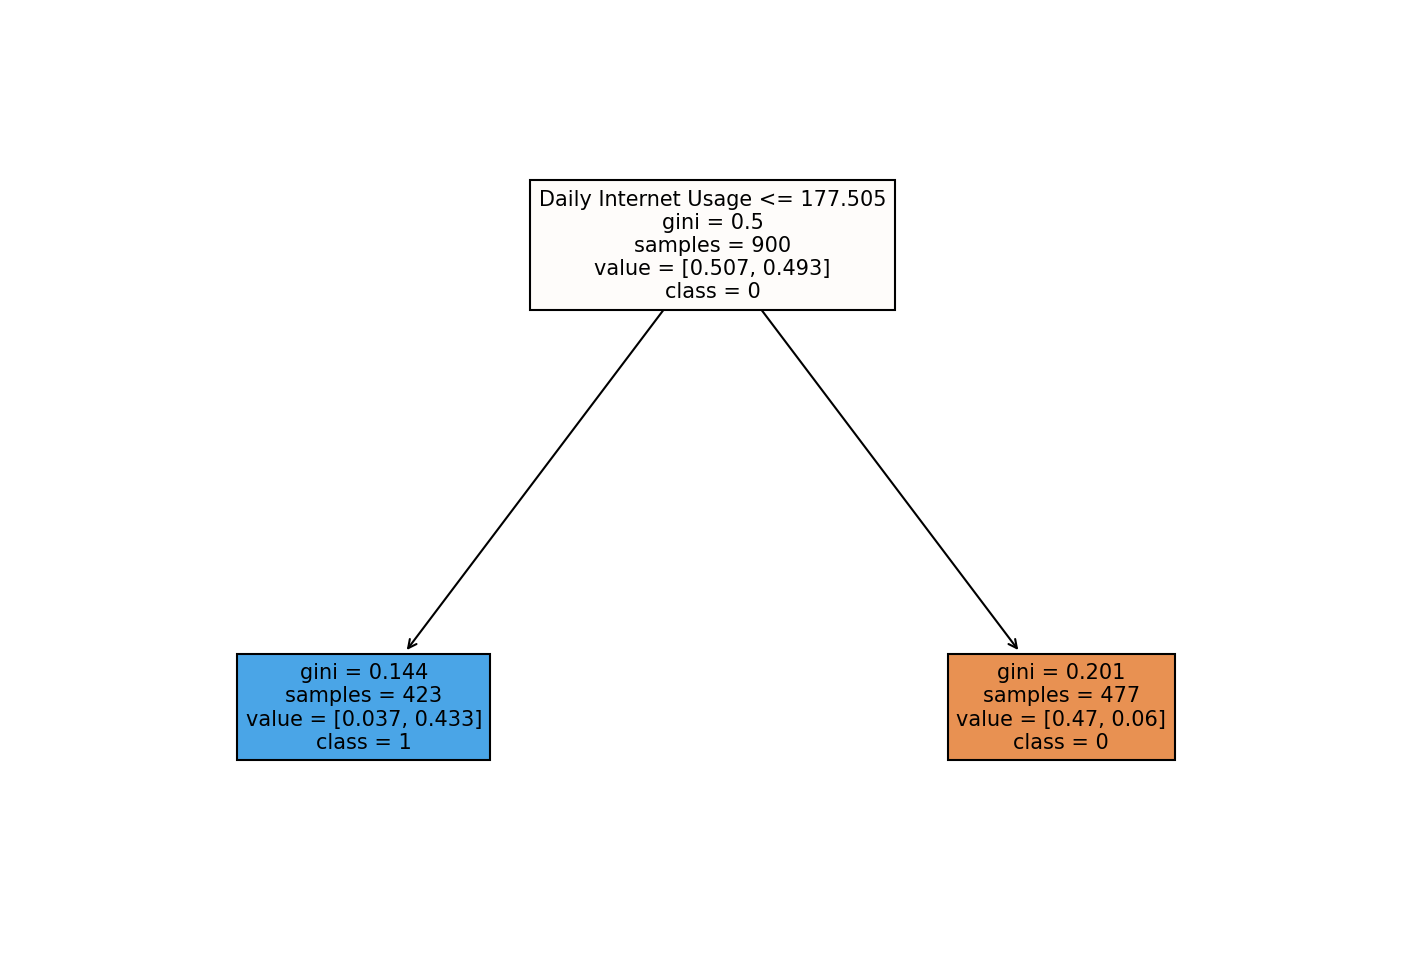

In [21]:
#features = list(X.columns)
targets = df["Clicked on Ad"].astype("str")
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model.estimators_[0],
          filled=True,
          feature_names=X.columns.to_list(),
          class_names=targets.unique().tolist(),
          fontsize=10);

# Daily Time Spent on Site 68.95
# Age 35.00
# Area Income 61833.90
# Daily Internet Usage 170.00
# Male 0

# 1. ağaç 1 olarak tahmin etti.

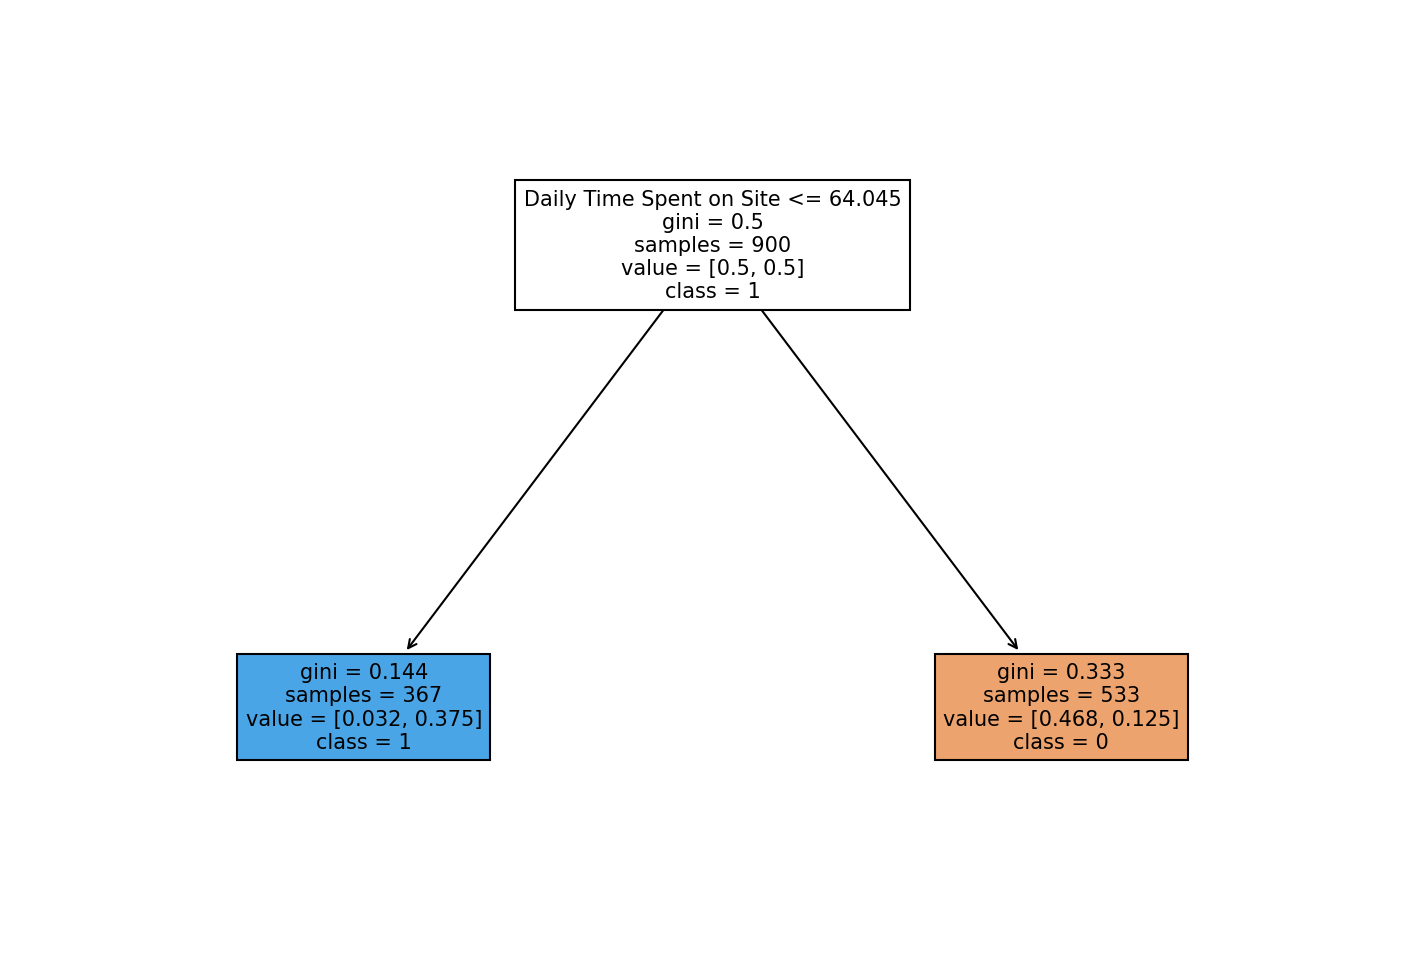

In [22]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model.estimators_[1],
          filled=True,
          feature_names=X.columns.tolist(),
          class_names=targets.unique().tolist(),
          fontsize=10);

# Daily Time Spent on Site 68.95
# Age 35.00
# Area Income 61833.90
# Daily Internet Usage 170.00
# Male 0

# 2. ağaç 0 olarak tahmin etti.

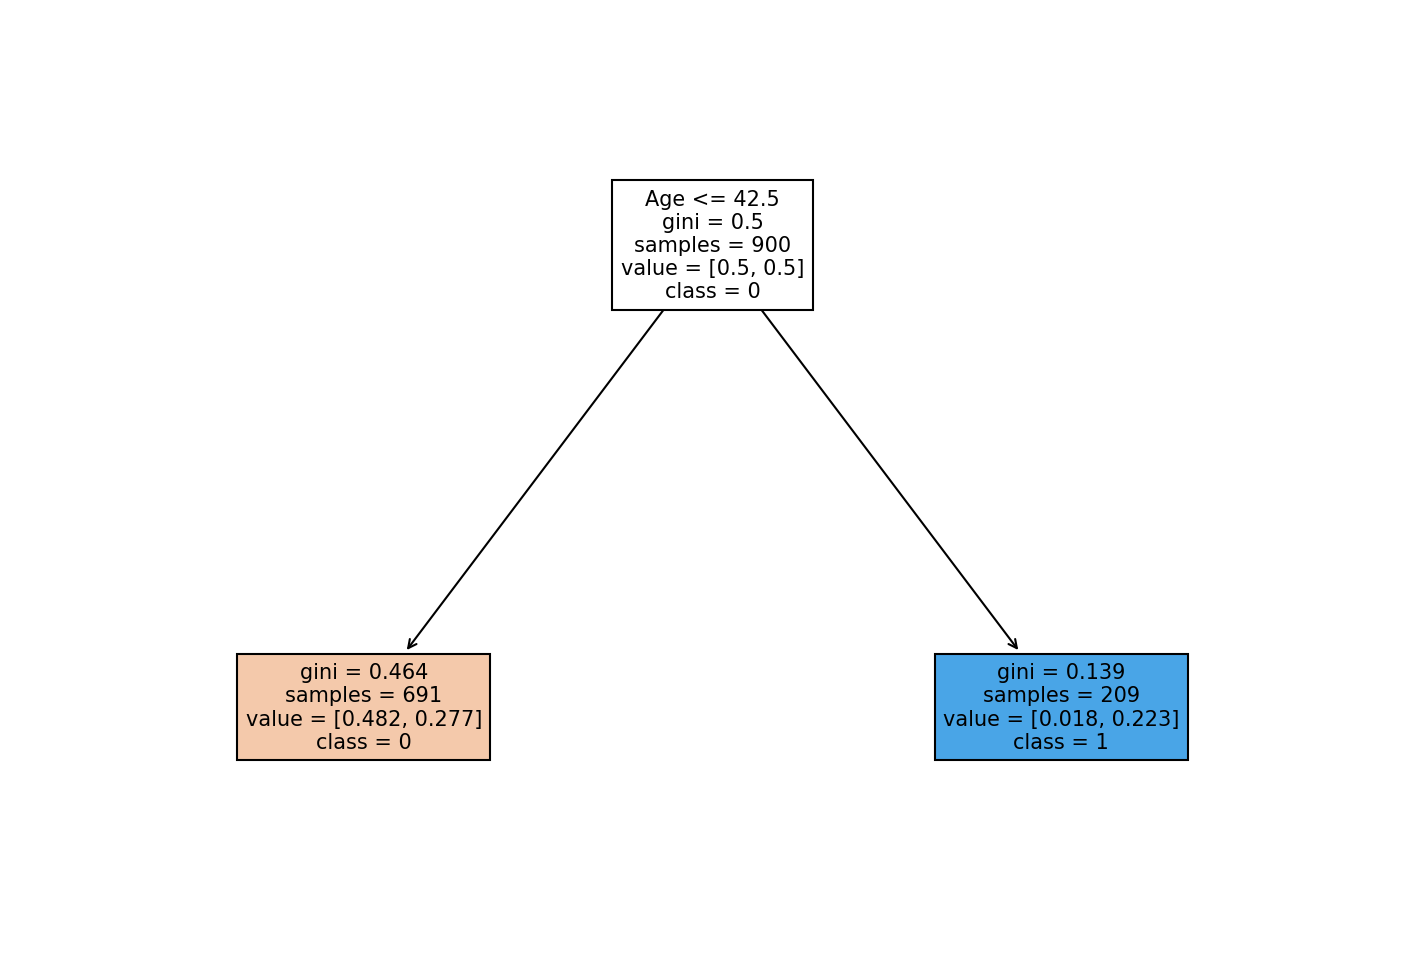

In [23]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model.estimators_[2],
          filled=True,
          feature_names=X.columns.tolist(),
          class_names=targets.unique().tolist(),
          fontsize=10);

# Daily Time Spent on Site 68.95
# Age 35.00
# Area Income 61833.90
# Daily Internet Usage 170.00
# Male 0

# 3. ağaç 0 olarak tahmin etti.

In [24]:
model.estimator_errors_

array([0.09666667, 0.15660636, 0.29526371])

**Ağaç Ağırlığı = (1/2) * log((1 - error_rate) / error_rate)**

In [25]:
1/2*np.log((1-0.09666667)/0.09666667)

# 1. ağacımızın ağırlığı

1.117411476360216

In [26]:
1/2*np.log((1-0.15660636)/0.15660636)

# 2. ağacımızın ağırlığı

0.8418492023096668

In [27]:
1/2*np.log((1-0.29526371)/0.29526371)

# 3. ağacımızın ağırlığı

0.43497739343711583

1. ağaç 1 olarak tahmin etti.
2. ağaç 0 olarak tahmin etti.
3. ağaç 0 olarak tahmin etti.

In [28]:
0.8418492023096668 + 0.43497739343711583

# 0 olarak tahmin eden ağaçların ağırlık toplamları = 1.2768265957467826
# 1 olarak tahmin eden ağaçların ağırlık toplamları = 1.117411476360216

# 0 olarak tahmin eden ağaçların ağırlığı daha fazla olduğundan gözlemim 0 olarak tahmin edilir.

1.2768265957467826

In [29]:
error_rates = []

for n in range(1,300):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - f1_score(y_test,preds)
    
    error_rates.append(err)

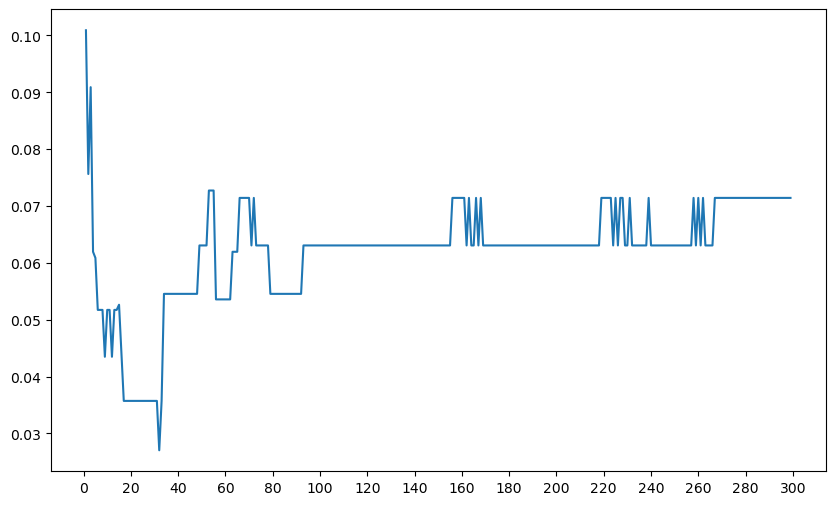

In [30]:
plt.plot(range(1,300), error_rates)
plt.xticks(range(0, 301, 20));

### AdaBoost Model Tuning - Gridsearch

In [31]:
model = AdaBoostClassifier(random_state=42)

In [32]:
param_grid = {"n_estimators": [50, 100, 200],
             "learning_rate": [0.01, 0.1, 0.5, 1]}

In [33]:
ada_grid_model = GridSearchCV(model, param_grid, cv=5, scoring="f1")

In [34]:
ada_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [35]:
ada_grid_model.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [36]:
ada_grid_model.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

In [37]:
ada_grid_model.best_score_

0.969132103588408

In [38]:
y_pred = ada_grid_model.predict(X_test)
y_pred_proba = ada_grid_model.predict_proba(X_test)

ada_f1 = f1_score(y_test, y_pred)
ada_recall = recall_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred_proba[:,1])
eval_metric(ada_grid_model, X_train, y_train, X_test, y_test)

# metricleri karşılaştırmak değişkenlere atıyoruz. test ve train datasının scorlarnı karşılaştırıyoruz.

Test_Set
[[40  4]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.93      0.95      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[453   3]
 [ 18 426]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       456
           1       0.99      0.96      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



### Feature_Importances

In [39]:
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
model.feature_importances_

feats = pd.DataFrame(index=X.columns, data= model.feature_importances_, columns=['ada_importance'])
ada_imp_feats = feats.sort_values("ada_importance", ascending = False)
ada_imp_feats

,ada_importance
Daily Internet Usage,0.29
Daily Time Spent on Site,0.28
Age,0.22
Area Income,0.21
Male,0.00


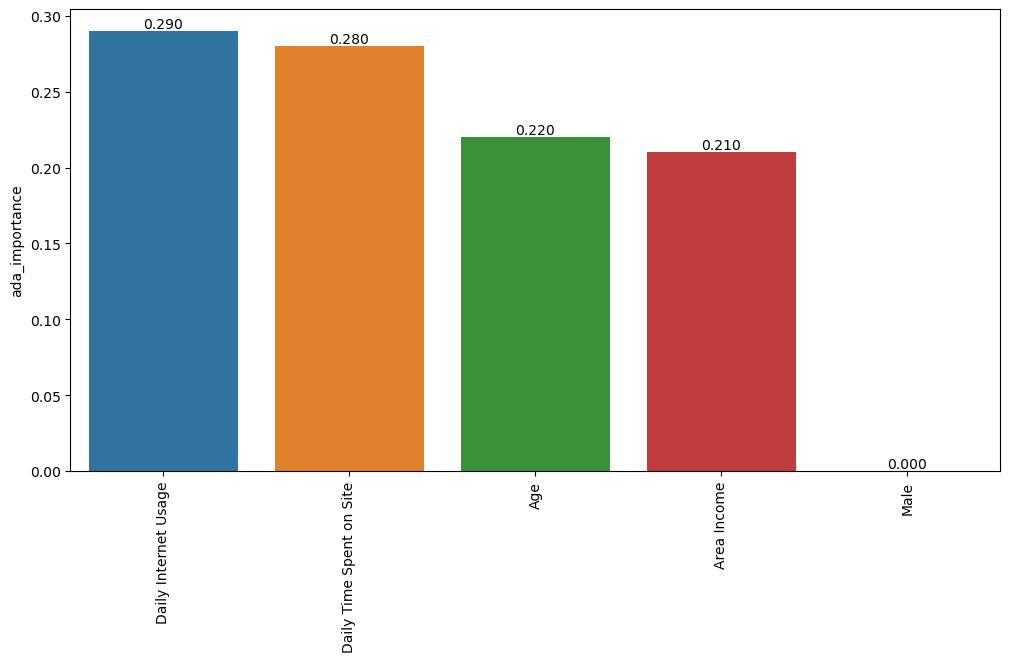

In [40]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=ada_imp_feats, x=ada_imp_feats.index, y='ada_importance')
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=90);

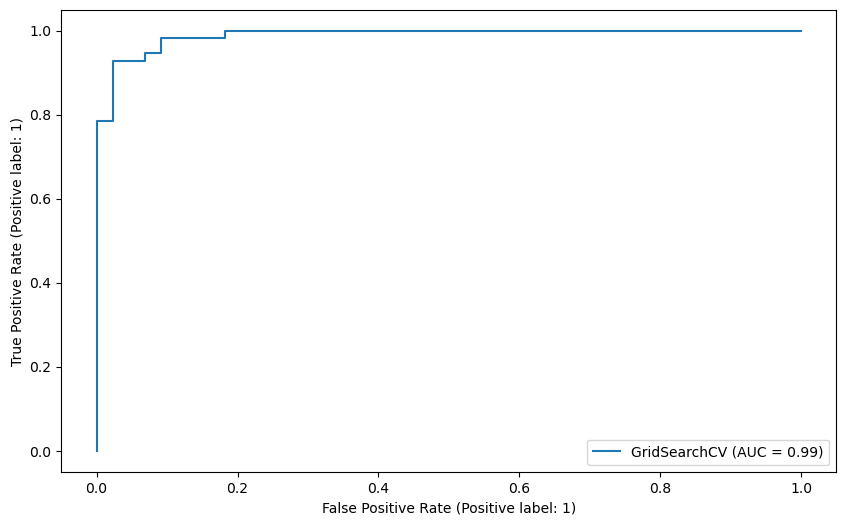

In [41]:
RocCurveDisplay.from_estimator(ada_grid_model, X_test, y_test);

## Gradient Boosting Modelling and Model Performance

In [42]:
np.log(4/2)  # 1 olma olasığı

0.6931471805599453

In [43]:
tah_ol=(np.e**np.log(4/2)) /(1+np.e**np.log(4/2))
tah_ol

0.6666666666666666

In [44]:
1 - tah_ol # 1 olma olasılığındaki residual değeri

0.33333333333333337

In [45]:
0 - tah_ol # 1 olma olasılığındaki residual değeri

-0.6666666666666666

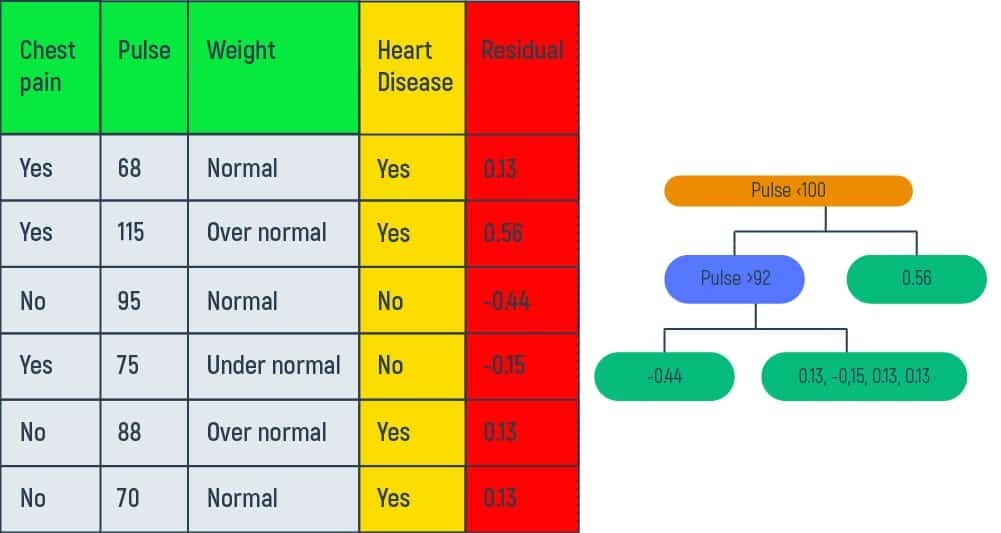

In [46]:
grad_model = GradientBoostingClassifier(random_state=42)

In [47]:
grad_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [48]:
eval_metric(grad_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  3]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.95      0.96      0.96        56

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100


Train_Set
[[456   0]
 [  1 443]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [49]:
model = GradientBoostingClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.95
train_accuracy    1.00
test_precision    0.96
train_precision   1.00
test_recall       0.95
train_recall      1.00
test_f1           0.95
train_f1          1.00
test_roc_auc      0.99
train_roc_auc     1.00
dtype: float64

### Gradient Boosting Model Tuning - Gridsearch

In [50]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "subsample": [0.5, 0.8],
    "max_features": [None, 2, 34],
    "learning_rate": [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}

In [51]:
gb_model = GradientBoostingClassifier(random_state=42)

In [52]:
gb_grid = GridSearchCV(gb_model,
                       param_grid,
                       scoring="f1",
                       verbose=2,
                       n_jobs=-1,
                       return_train_score=True).fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [53]:
gb_grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'max_features': 2,
 'n_estimators': 300,
 'subsample': 0.5}

In [54]:
gb_grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_features=2, n_estimators=300,
                           random_state=42, subsample=0.5)

In [55]:
gb_grid.best_score_

0.964535348901264

In [56]:
y_pred = gb_grid.predict(X_test)
y_pred_proba = gb_grid.predict_proba(X_test)

gb_f1 = f1_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)

eval_metric(gb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[40  4]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        44
           1       0.93      0.96      0.95        56

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Train_Set
[[451   5]
 [ 13 431]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       456
           1       0.99      0.97      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



### Feature Importances

In [57]:
model = GradientBoostingClassifier(max_features= 3, n_estimators = 100, subsample = 0.5, random_state=42)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['grad_importance'])
grad_imp_feats = feats.sort_values("grad_importance")
grad_imp_feats

,grad_importance
Male,0.00
Age,0.05
Area Income,0.07
Daily Time Spent on Site,0.32
Daily Internet Usage,0.55


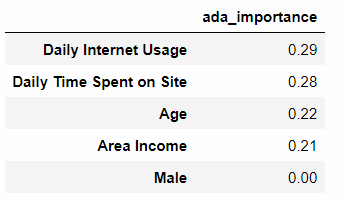

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Male'),
  Text(1, 0, 'Age'),
  Text(2, 0, 'Area Income'),
  Text(3, 0, 'Daily Time Spent on Site'),
  Text(4, 0, 'Daily Internet Usage')])

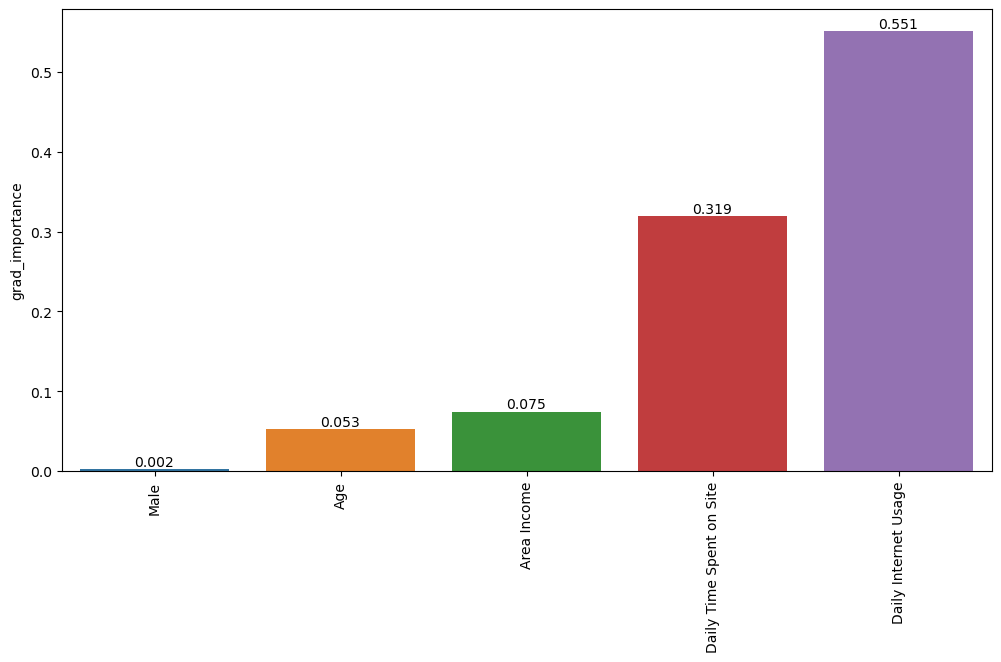

In [58]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grad_imp_feats,
                 x=grad_imp_feats.index,
                 y='grad_importance')
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.xticks(rotation=90)

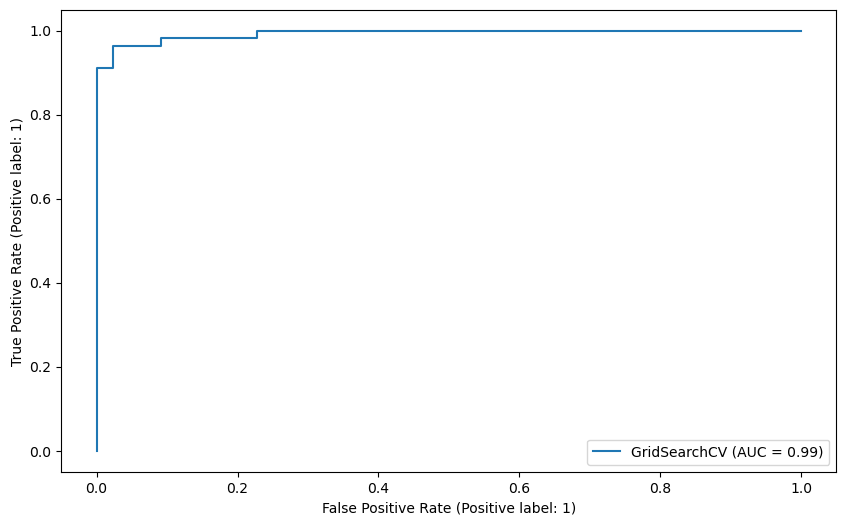

In [59]:
RocCurveDisplay.from_estimator(gb_grid, X_test, y_test);

## XGBoost: Extreme Gradient Boosting Modelling and Model Performance

In [60]:
xgb = XGBClassifier(random_state= 42).fit(X_train, y_train)

In [61]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[40  4]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        44
           1       0.93      0.96      0.95        56

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Train_Set
[[456   0]
 [  0 444]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



### XGBoost Model Tuning - Gridsearch

In [62]:
param_grid = {
    "n_estimators": [50, 100, 200],
    'max_depth': [3, 4, 5],
    "learning_rate": [0.1, 0.2],
    "subsample": [0.5, 0.8, 1],
    "colsample_bytree": [0.5, 0.7, 1]
}

In [63]:
xgb_model = XGBClassifier(random_state=42)

In [64]:
xgb_grid = GridSearchCV(xgb_model,
                        param_grid,
                        scoring="f1",
                        n_jobs=-1,
                        return_train_score=True).fit(X_train, y_train)

In [65]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 200,
 'subsample': 1}

In [66]:
xgb_grid.best_score_

0.9680655403741228

In [67]:
y_pred = xgb_grid.predict(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[40  4]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        44
           1       0.93      0.93      0.93        56

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100


Train_Set
[[455   1]
 [  8 436]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       456
           1       1.00      0.98      0.99       444

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900



### Feature Importances

In [68]:
model = XGBClassifier(n_estimators= 50, colsample_bytree = 0.7, subsample= 0.8, learning_rate = 0.1,
                      max_depth= 3, random_state = 42)

model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance")
xgb_imp_feats

,xgb_importance
Male,0.02
Age,0.08
Area Income,0.10
Daily Time Spent on Site,0.31
Daily Internet Usage,0.49


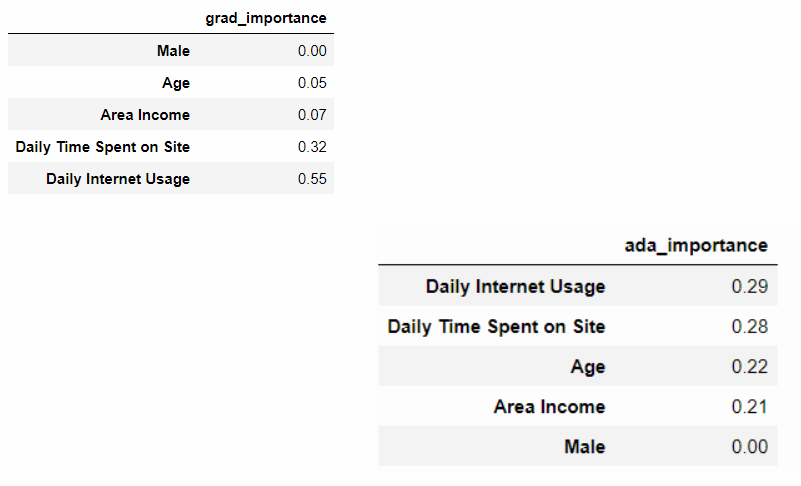

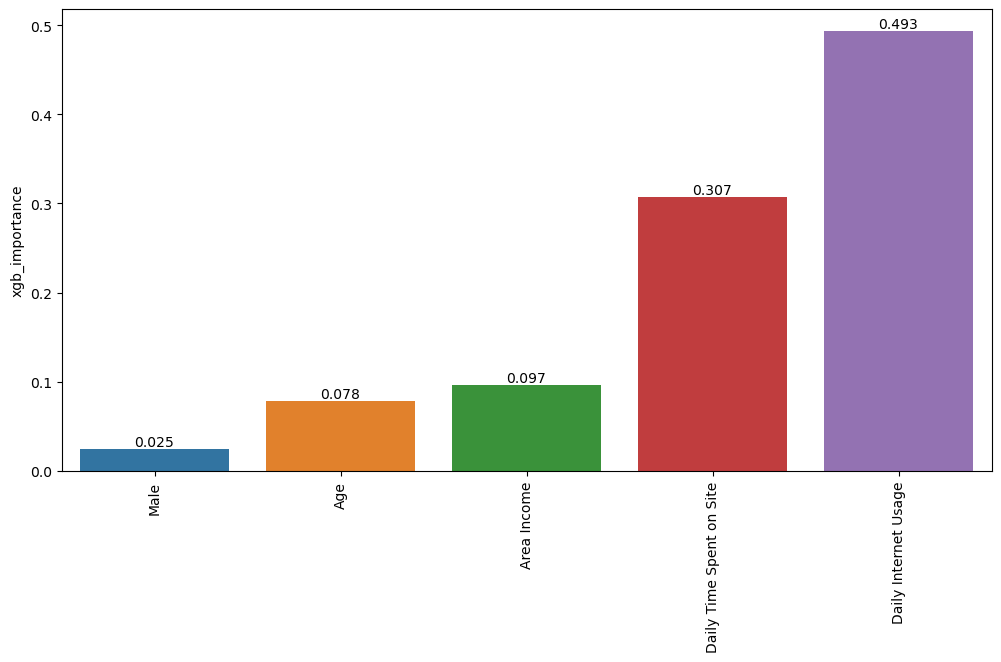

In [69]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index, y='xgb_importance')
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.xticks(rotation=90);

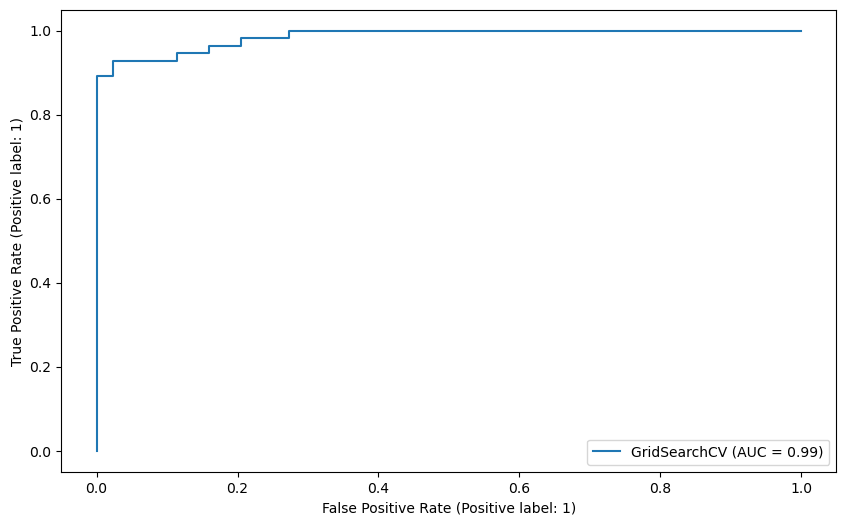

In [70]:
RocCurveDisplay.from_estimator(xgb_grid, X_test, y_test)

## Light GBM

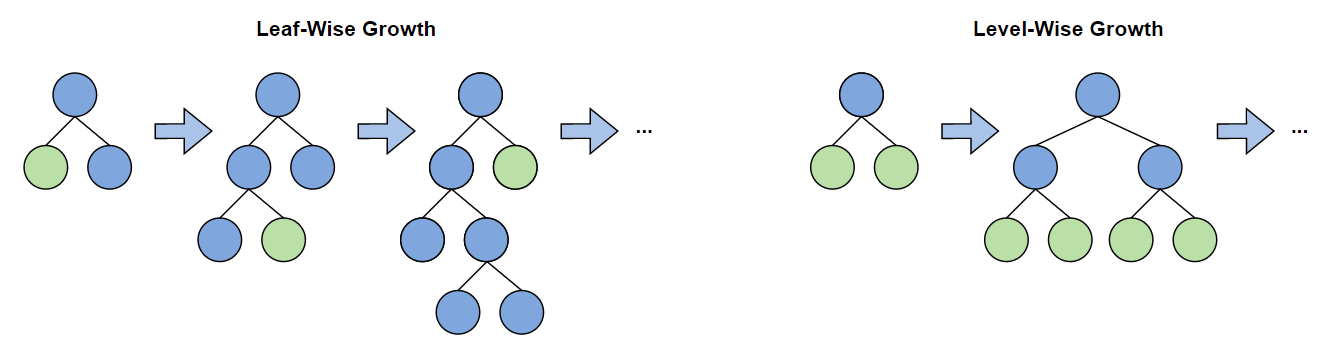

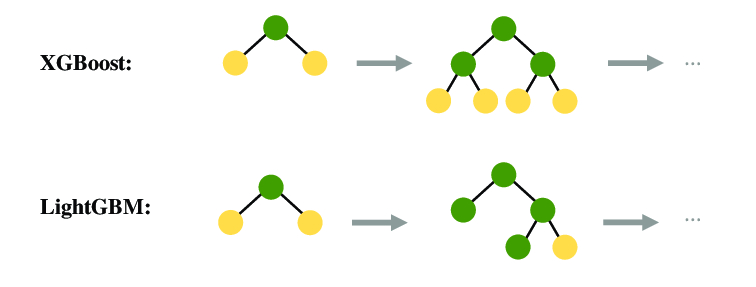

In [71]:
lgbm_model = LGBMClassifier(random_state=42).fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 444, number of negative: 456
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493333 -> initscore=-0.026668
[LightGBM] [Info] Start training from score -0.026668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [72]:
eval_metric(lgbm_model, X_train, y_train, X_test, y_test)

Test_Set
[[42  2]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        44
           1       0.96      0.93      0.95        56

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Train_Set
[[456   0]
 [  0 444]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [73]:
model = LGBMClassifier(random_state=42)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=[
                            'accuracy', 'precision_macro', 'recall_macro',
                            'f1_macro', 'roc_auc_ovr'
                        ],
                        cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
mean_scores = df_scores.mean()[2:]

print(mean_scores)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 399, number of negative: 411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 810, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492593 -> initscore=-0.029632
[LightGBM] [Info] Start training from score -0.029632
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 400, number of negative: 410
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 810, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493827 -> initscore=-0.024693
[LightGBM] [Info] Start training from score -0.024693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

### Light GBM Model Tuning - Gridsearch

In [74]:
param_grid = {
    'learning_rate': [0.1, 1],
    'n_estimators': [50, 100, 200],
    'num_leaves': [20, 30, 50],  
    'max_depth': [-1, 3, 4, 5],     
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [75]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_grid = GridSearchCV(estimator=lgbm_model,
                         param_grid=param_grid,
                         cv=5,
                         scoring='f1',
                         n_jobs=-1,
                         return_train_score=True).fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 444, number of negative: 456
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493333 -> initscore=-0.026668
[LightGBM] [Info] Start training from score -0.026668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [76]:
lgbm_grid.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 50,
 'num_leaves': 20,
 'subsample': 0.8}

In [77]:
lgbm_grid.best_score_

0.9604055465196243

In [78]:
y_pred = lgbm_grid.predict(X_test)

lgbm_f1 = f1_score(y_test, y_pred)
lgbm_recall = recall_score(y_test, y_pred)
lgbm_auc = roc_auc_score(y_test, y_pred)

eval_metric(lgbm_grid, X_train, y_train, X_test, y_test)

Test_Set
[[41  3]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.95      0.93      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[455   1]
 [  9 435]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       456
           1       1.00      0.98      0.99       444

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900



### Feature Importances

In [79]:
model = LGBMClassifier(random_state=42, colsample_bytree = 0.5, subsample= 0.8)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['lgbm_importance'])
lgbm_imp_feats = feats.sort_values("lgbm_importance")
lgbm_imp_feats

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 444, number of negative: 456
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493333 -> initscore=-0.026668
[LightGBM] [Info] Start training from score -0.026668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,lgbm_importance
Male,93
Age,509
Daily Time Spent on Site,707
Daily Internet Usage,821
Area Income,854


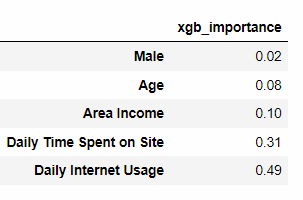

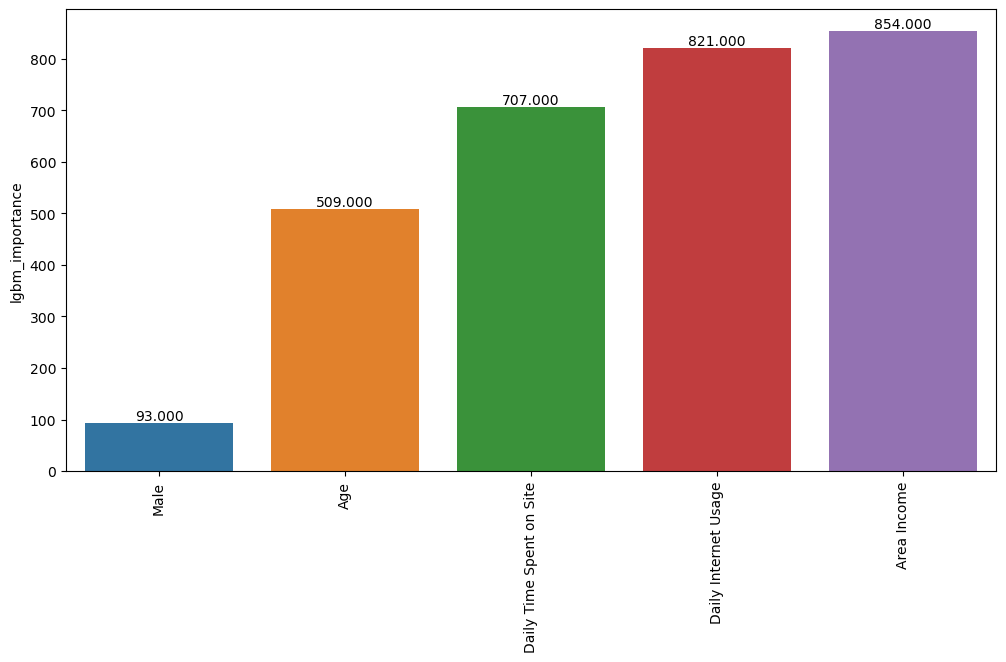

In [80]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=lgbm_imp_feats, x=lgbm_imp_feats.index, y='lgbm_importance')
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.xticks(rotation=90);

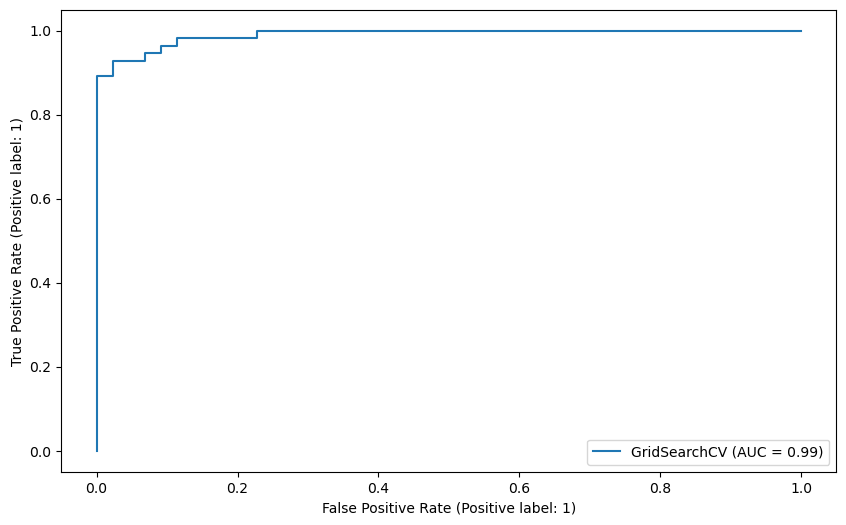

In [81]:
RocCurveDisplay.from_estimator(lgbm_grid, X_test, y_test)

## Random Forests

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  3]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.95      0.96      0.96        56

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100


Train_Set
[[456   0]
 [  0 444]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



## Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
dt_f1 = f1_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred)
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[38  6]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        44
           1       0.90      0.96      0.93        56

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.92       100
weighted avg       0.92      0.92      0.92       100


Train_Set
[[456   0]
 [  0 444]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



## Logistic Regression

In [84]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [85]:
scaler = MinMaxScaler()

In [86]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
log_model=LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred=log_model.predict(X_test_scaled)
log_f1 = f1_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[43  1]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        44
           1       0.98      0.95      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100


Train_Set
[[451   5]
 [ 22 422]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       456
           1       0.99      0.95      0.97       444

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900



## KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)
knn_f1 = f1_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred)
eval_metric(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[42  2]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.96      0.96      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100


Train_Set
[[454   2]
 [ 24 420]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       456
           1       1.00      0.95      0.97       444

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900



## SVM

In [89]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
svc_f1 = f1_score(y_test, y_pred)
svc_recall = recall_score(y_test, y_pred)
svc_auc = roc_auc_score(y_test, y_pred)
eval_metric(svm_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[42  2]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.96      0.96      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100


Train_Set
[[450   6]
 [ 17 427]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       456
           1       0.99      0.96      0.97       444

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900



## Comparing Models

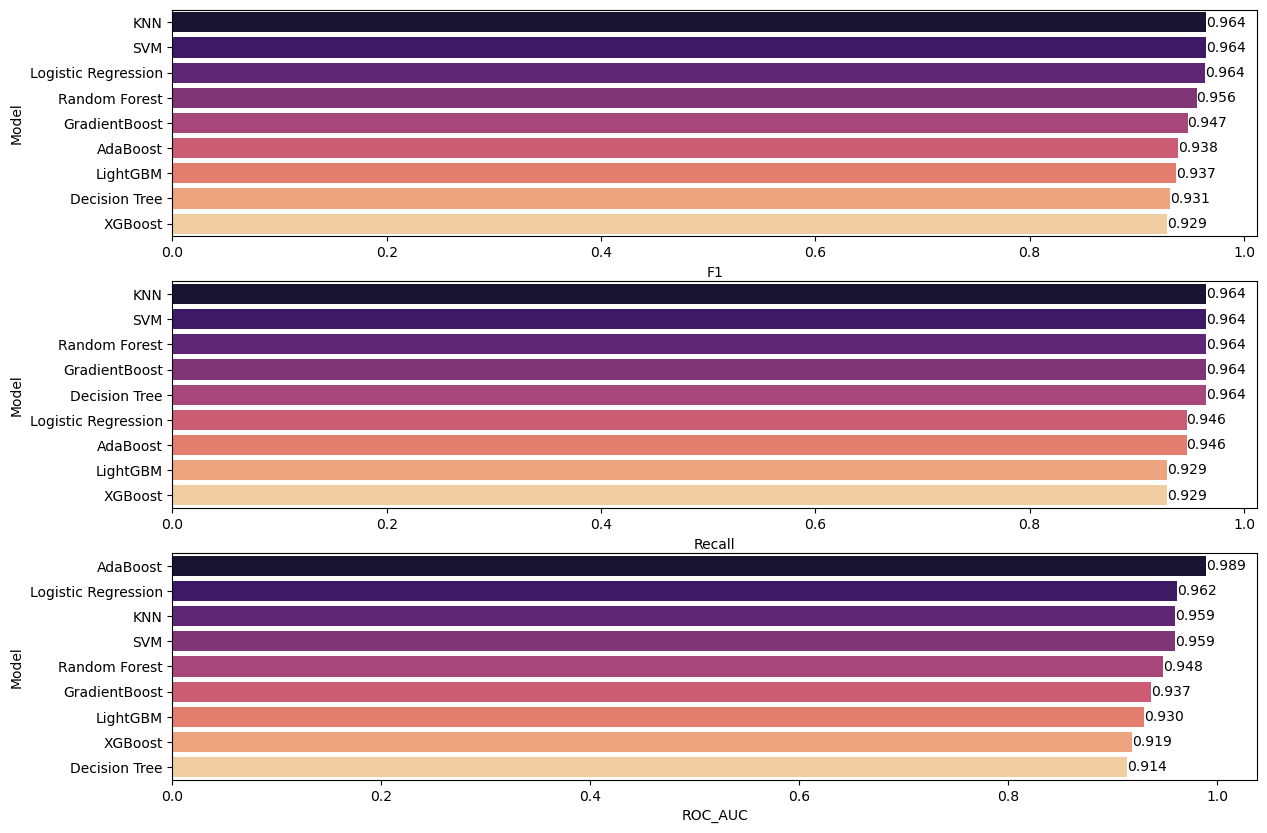

In [90]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "KNN", "SVM", "Decision Tree", "Random Forest", "AdaBoost",
                                 "GradientBoost", "XGBoost", "LightGBM"],
                        "F1": [log_f1, knn_f1, svc_f1, dt_f1, rf_f1, ada_f1, gb_f1, xgb_f1, lgbm_f1],
                        "Recall": [log_recall, knn_recall, svc_recall, dt_recall, rf_recall, ada_recall, gb_recall, xgb_recall, lgbm_recall],
                        "ROC_AUC": [log_auc, knn_auc, svc_auc, dt_auc, rf_auc, ada_auc, gb_auc, xgb_auc, lgbm_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="magma")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="magma")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="magma")
labels(ax)
plt.show()

In [1]:
# datasetimiz küçük olduğu için yukarıdaki gibi bir sonuç gördük.

## Lazy Predict Kütüphanesi

In [91]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

models

100%|██████████| 29/29 [00:03<00:00,  7.94it/s]

[LightGBM] [Info] Number of positive: 444, number of negative: 456
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 810
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493333 -> initscore=-0.026668
[LightGBM] [Info] Start training from score -0.026668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.98,0.98,0.98,0.98,0.04
LogisticRegression,0.97,0.97,0.97,0.97,0.04
RidgeClassifier,0.96,0.96,0.96,0.96,0.06
Perceptron,0.96,0.96,0.96,0.96,0.03
NuSVC,0.96,0.96,0.96,0.96,0.09
LinearDiscriminantAnalysis,0.96,0.96,0.96,0.96,0.03
RidgeClassifierCV,0.96,0.96,0.96,0.96,0.05
CalibratedClassifierCV,0.96,0.96,0.96,0.96,0.10
GaussianNB,0.96,0.96,0.96,0.96,0.04
